This file calculates the correlation and regression between aggregation of all tweets the user see and the post study report.

post_survey_emotion ~ pre_survey_emotion + (user_demographics) + exposure

The way to model exposure: <br>
    1. average of all viewed tweets
    2. addition of all viewed tweets

In [ ]:
import pandas as pd

I will first process the post_study.csv file.

In [99]:
emotions = ['nervous', 'sad', 'happy', 'calm', 'excited',
            'angry', 'relaxed', 'fearful', 'enthusiastic', 'satisfied',
            'bored', 'lonely']

In [83]:
emotion_categories = ['HAP', 'HAN', 'LAP', 'LAN']

In [36]:
# read the post_study.csv file
post_study = pd.read_csv('../csvs/post_study.csv')
print(len(post_study))

1256


In [37]:
emotion_columns = [f'emo_{e.lower()}' for e in emotions]
post_study = post_study[['participantId'] + emotion_columns]
post_study = post_study.rename(columns={'participantId': 'user_id'})
print(len(post_study))
post_study.head()

1256


,user_id,emo_nervous,emo_sad,emo_happy,emo_calm,emo_excited,emo_angry,emo_relaxed,emo_fearful,emo_enthusiastic,emo_satisfied,emo_bored,emo_lonely
0,iP009a45e51df9d4f5,_1_never,_1_never,_4_most_of_the_time,_2_small_amount,_3_half_the_time,_2_small_amount,_3_half_the_time,_1_never,_2_small_amount,_4_most_of_the_time,_1_never,_2_small_amount
1,iP0101580a98ac0395,_1_never,_1_never,_2_small_amount,_3_half_the_time,_2_small_amount,_1_never,_3_half_the_time,_1_never,_1_never,_2_small_amount,_3_half_the_time,_1_never
2,iP011d4828b4e4458b,_1_never,_3_half_the_time,_2_small_amount,_3_half_the_time,_2_small_amount,_3_half_the_time,_2_small_amount,_1_never,_2_small_amount,_2_small_amount,_3_half_the_time,_3_half_the_time
3,iP0122f70ccf3ebf7d,_1_never,_2_small_amount,_4_most_of_the_time,_4_most_of_the_time,_4_most_of_the_time,_2_small_amount,_4_most_of_the_time,_1_never,_4_most_of_the_time,_4_most_of_the_time,_2_small_amount,_1_never
4,iP01a298e3d58f5df5,_2_small_amount,_2_small_amount,_3_half_the_time,_2_small_amount,_4_most_of_the_time,_1_never,_3_half_the_time,_2_small_amount,_4_most_of_the_time,_2_small_amount,_2_small_amount,_1_never


In [38]:
# Create the emotion mapping
emotion_mapping = {
    '_1_never': 1,
    '_2_small_amount': 2,
    '_3_half_the_time': 3,
    '_4_most_of_the_time': 4,
    '_5_all_the_time': 5,
}

# Define emotion columns
emotions = ['Nervous', 'Sad', 'Happy', 'Calm', 'Excited',
            'Angry', 'Relaxed', 'Fearful', 'Enthusiastic', 'Satisfied',
            'Bored', 'Lonely']

emotion_columns = [f'emo_{e.lower()}' for e in emotions]

# Apply cleaning and mapping
for col in emotion_columns:
    post_study[col] = (
        post_study[col]
        .astype(str)                # ensure strings
        .str.strip()                # remove leading/trailing spaces
        .str.lower()                # ensure lowercase
        .map(emotion_mapping)       # apply mapping
    )

print(len(post_study))
post_study.head()

1256


,user_id,emo_nervous,emo_sad,emo_happy,emo_calm,emo_excited,emo_angry,emo_relaxed,emo_fearful,emo_enthusiastic,emo_satisfied,emo_bored,emo_lonely
0,iP009a45e51df9d4f5,1.0,1.0,4.0,2.0,3.0,2.0,3.0,1.0,2.0,4.0,1.0,2.0
1,iP0101580a98ac0395,1.0,1.0,2.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,1.0
2,iP011d4828b4e4458b,1.0,3.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0
3,iP0122f70ccf3ebf7d,1.0,2.0,4.0,4.0,4.0,2.0,4.0,1.0,4.0,4.0,2.0,1.0
4,iP01a298e3d58f5df5,2.0,2.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,2.0,2.0,1.0


In [39]:
# rename all emo_ to post_survey_
post_study = post_study.rename(columns=lambda x: x.replace('emo_', 'post_survey_'))
print(len(post_study))
post_study.head()

1256


,user_id,post_survey_nervous,post_survey_sad,post_survey_happy,post_survey_calm,post_survey_excited,post_survey_angry,post_survey_relaxed,post_survey_fearful,post_survey_enthusiastic,post_survey_satisfied,post_survey_bored,post_survey_lonely
0,iP009a45e51df9d4f5,1.0,1.0,4.0,2.0,3.0,2.0,3.0,1.0,2.0,4.0,1.0,2.0
1,iP0101580a98ac0395,1.0,1.0,2.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,1.0
2,iP011d4828b4e4458b,1.0,3.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0
3,iP0122f70ccf3ebf7d,1.0,2.0,4.0,4.0,4.0,2.0,4.0,1.0,4.0,4.0,2.0,1.0
4,iP01a298e3d58f5df5,2.0,2.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,2.0,2.0,1.0


First, we will need to create a file with all posts a user sees before the post_study.
-> the user_view_tweet_sorted.csv has all we need. 

In [47]:
# read the csv file
views = pd.read_csv('../csvs/user_view_tweet_sorted.csv')
print(len(views))

1798807


In [48]:
gpt = pd.read_csv('../csvs/gpt_outputs.csv')
print(len(gpt))

680092


In [49]:
# join the two dataframes on the 'tweet_id' column
merged = pd.merge(views, gpt, on='tweet_id', how='left')
print(len(merged))

1798807


In [50]:
merged.head()

,user_id,tweet_id,time,tab_id,predicted_nervous,predicted_sad,predicted_happy,predicted_calm,predicted_excited,predicted_aroused,predicted_angry,predicted_relaxed,predicted_fearful,predicted_enthusiastic,predicted_still,predicted_satisfied,predicted_bored,predicted_lonely
0,009FBF921182482EB3B2C7C66D5DF395,1810307154215424230,2024-07-08 19:22:08.405,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,1.0,1.0,3.0,2.0,4.0,3.0,1.0,2.0,2.0,4.0,1.0,2.0,1.0,1.0
1,009FBF921182482EB3B2C7C66D5DF395,1810304903497011213,2024-07-08 19:26:02.945,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,1.0,2.0,1.0,1.0,2.0,2.0,4.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0
2,009FBF921182482EB3B2C7C66D5DF395,1695333724530102724,2024-07-08 19:26:04.360,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,009FBF921182482EB3B2C7C66D5DF395,1809973009819521438,2024-07-08 19:27:20.583,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,1.0,2.0,2.0,1.0,3.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0
4,009FBF921182482EB3B2C7C66D5DF395,1810420372635799765,2024-07-08 19:29:06.474,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# get a set of unique tweet_id have NaN in the 'predicted_still' column
unique_tweet_ids = set(merged[merged['predicted_still'].isna()]['tweet_id'])
print(len(unique_tweet_ids))

329537


In [14]:
# read unique_tweet_ids.csv as a set
unique_tweet_ids_csv = set(pd.read_csv('../csvs/unique_tweet_ids.csv')['tweet_id_numeric'])
print(len(unique_tweet_ids_csv))

384273


In [16]:
# check how many of these tweet_ids are in the unique_tweet_ids_csv
intersection = unique_tweet_ids.intersection(unique_tweet_ids_csv)
print(len(intersection))

35488


There are 329537 unique tweets that we don't have prediction, but only 35488 are in the valid tweet section. This means that the user has also view many in-valid tweets. <br>

I am curious for what reasons there are so many tweets not viewed. <br>

But I will leave this for later.

Now I want to drop the rows without predictions. 

In [52]:
# drop the rows without predictions
merged = merged.dropna(subset=['predicted_still'])
print(len(merged))

1061353


In [53]:
merged.columns

Index(['user_id', 'tweet_id', 'time', 'tab_id', 'predicted_nervous',
       'predicted_sad', 'predicted_happy', 'predicted_calm',
       'predicted_excited', 'predicted_aroused', 'predicted_angry',
       'predicted_relaxed', 'predicted_fearful', 'predicted_enthusiastic',
       'predicted_still', 'predicted_satisfied', 'predicted_bored',
       'predicted_lonely'],
      dtype='object')

In [54]:
merged.head()

,user_id,tweet_id,time,tab_id,predicted_nervous,predicted_sad,predicted_happy,predicted_calm,predicted_excited,predicted_aroused,predicted_angry,predicted_relaxed,predicted_fearful,predicted_enthusiastic,predicted_still,predicted_satisfied,predicted_bored,predicted_lonely
0,009FBF921182482EB3B2C7C66D5DF395,1810307154215424230,2024-07-08 19:22:08.405,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,1.0,1.0,3.0,2.0,4.0,3.0,1.0,2.0,2.0,4.0,1.0,2.0,1.0,1.0
1,009FBF921182482EB3B2C7C66D5DF395,1810304903497011213,2024-07-08 19:26:02.945,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,1.0,2.0,1.0,1.0,2.0,2.0,4.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0
3,009FBF921182482EB3B2C7C66D5DF395,1809973009819521438,2024-07-08 19:27:20.583,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,1.0,2.0,2.0,1.0,3.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0
5,009FBF921182482EB3B2C7C66D5DF395,1810394458334310744,2024-07-08 19:29:06.558,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,4.0,1.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0
6,009FBF921182482EB3B2C7C66D5DF395,1810277655389917198,2024-07-08 19:30:24.875,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,1.0,5.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0


Now I have the merged file with all the gpt predictions. I want to aggregate them. First, I will try the average. 

In [55]:
print(len(merged))

1061353


In [56]:
# get the number of users
num_users = merged['user_id'].nunique()
print(f'Number of users: {num_users}')

# get how many tweets each user saw on average
print(len(merged) / num_users)

Number of users: 1478
718.1008119079837


In [59]:
# group the rows by user_id, aggregate by taking the mean of all "predicted" columns
predicted_emotions_columns = [
    'predicted_nervous', 'predicted_sad', 'predicted_happy', 
    'predicted_calm', 'predicted_excited', 'predicted_aroused', 
    'predicted_angry', 'predicted_relaxed', 'predicted_fearful', 
    'predicted_enthusiastic', 'predicted_still', 'predicted_satisfied', 
    'predicted_bored', 'predicted_lonely'
]

merged_average = (
    merged.groupby('user_id')[predicted_emotions_columns]
    .mean()
    .reset_index()
)
print(len(merged_average))

1478


In [60]:
merged_average.columns

Index(['user_id', 'predicted_nervous', 'predicted_sad', 'predicted_happy',
       'predicted_calm', 'predicted_excited', 'predicted_aroused',
       'predicted_angry', 'predicted_relaxed', 'predicted_fearful',
       'predicted_enthusiastic', 'predicted_still', 'predicted_satisfied',
       'predicted_bored', 'predicted_lonely'],
      dtype='object')

In [61]:
merged_average.head()

,user_id,predicted_nervous,predicted_sad,predicted_happy,predicted_calm,predicted_excited,predicted_aroused,predicted_angry,predicted_relaxed,predicted_fearful,predicted_enthusiastic,predicted_still,predicted_satisfied,predicted_bored,predicted_lonely
0,009FBF921182482EB3B2C7C66D5DF395,1.793537,1.554758,2.262118,1.253142,2.865350,2.351885,2.202873,1.260323,2.041293,2.786355,1.096948,1.628366,1.012567,1.052065
1,015D95BA960E4D8387F933A0C7E87F69,1.657895,1.491228,2.600877,1.135965,3.118421,2.442982,2.254386,1.131579,1.732456,2.969298,1.030702,1.675439,1.030702,1.035088
2,028687F82CEF4E15B1B596ED0A8BD7A1,1.300881,1.346869,3.075342,1.162916,3.295010,2.421233,2.266145,1.162427,1.334638,3.472114,1.022505,2.081213,1.010274,1.035714
3,02959600EFEE405789463BE83D574429,1.610315,1.541547,2.616046,1.077364,3.171920,2.432665,2.103152,1.088825,1.693410,2.979943,1.017192,1.555874,1.022923,1.054441
4,0492FC538C4245778A446716617CEBFE,1.184466,1.320388,3.417476,1.097087,3.737864,2.650485,1.495146,1.077670,1.106796,3.669903,1.009709,1.941748,1.038835,1.038835


In [62]:
# rename the predicted_ to average_predicted_
merged_average = merged_average.rename(columns=lambda x: x.replace('predicted_', 'average_predicted_'))
print(len(merged_average))
merged_average.head()

1478


,user_id,average_predicted_nervous,average_predicted_sad,average_predicted_happy,average_predicted_calm,average_predicted_excited,average_predicted_aroused,average_predicted_angry,average_predicted_relaxed,average_predicted_fearful,average_predicted_enthusiastic,average_predicted_still,average_predicted_satisfied,average_predicted_bored,average_predicted_lonely
0,009FBF921182482EB3B2C7C66D5DF395,1.793537,1.554758,2.262118,1.253142,2.865350,2.351885,2.202873,1.260323,2.041293,2.786355,1.096948,1.628366,1.012567,1.052065
1,015D95BA960E4D8387F933A0C7E87F69,1.657895,1.491228,2.600877,1.135965,3.118421,2.442982,2.254386,1.131579,1.732456,2.969298,1.030702,1.675439,1.030702,1.035088
2,028687F82CEF4E15B1B596ED0A8BD7A1,1.300881,1.346869,3.075342,1.162916,3.295010,2.421233,2.266145,1.162427,1.334638,3.472114,1.022505,2.081213,1.010274,1.035714
3,02959600EFEE405789463BE83D574429,1.610315,1.541547,2.616046,1.077364,3.171920,2.432665,2.103152,1.088825,1.693410,2.979943,1.017192,1.555874,1.022923,1.054441
4,0492FC538C4245778A446716617CEBFE,1.184466,1.320388,3.417476,1.097087,3.737864,2.650485,1.495146,1.077670,1.106796,3.669903,1.009709,1.941748,1.038835,1.038835


In [64]:
# merge it with the post study dataframe on user_id
merged_exposure_post = pd.merge(merged_average, post_study, on='user_id', how='inner')
# print out what are the user_id in the post_study but not in merged_average
ids = set(post_study['user_id']) - set(merged_average['user_id'])
print(ids)

print(len(merged_exposure_post))
merged_exposure_post.head()

{'iPab71b6671e59b6ac', 'iP4840e7532914540e', 'iP11fa84039a0740c5', 'iPd17cf346f828d563', 'iP9824ba577bf28a93', 'iPa645b19e2ce32b38'}
1250


,user_id,average_predicted_nervous,average_predicted_sad,average_predicted_happy,average_predicted_calm,average_predicted_excited,average_predicted_aroused,average_predicted_angry,average_predicted_relaxed,average_predicted_fearful,...,post_survey_happy,post_survey_calm,post_survey_excited,post_survey_angry,post_survey_relaxed,post_survey_fearful,post_survey_enthusiastic,post_survey_satisfied,post_survey_bored,post_survey_lonely
0,009FBF921182482EB3B2C7C66D5DF395,1.793537,1.554758,2.262118,1.253142,2.865350,2.351885,2.202873,1.260323,2.041293,...,4.0,4.0,2.0,1.0,4.0,2.0,2.0,3.0,2.0,1.0
1,015D95BA960E4D8387F933A0C7E87F69,1.657895,1.491228,2.600877,1.135965,3.118421,2.442982,2.254386,1.131579,1.732456,...,1.0,1.0,1.0,5.0,2.0,1.0,1.0,1.0,3.0,2.0
2,028687F82CEF4E15B1B596ED0A8BD7A1,1.300881,1.346869,3.075342,1.162916,3.295010,2.421233,2.266145,1.162427,1.334638,...,5.0,5.0,5.0,1.0,4.0,1.0,5.0,4.0,1.0,1.0
3,02959600EFEE405789463BE83D574429,1.610315,1.541547,2.616046,1.077364,3.171920,2.432665,2.103152,1.088825,1.693410,...,4.0,2.0,3.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0
4,0492FC538C4245778A446716617CEBFE,1.184466,1.320388,3.417476,1.097087,3.737864,2.650485,1.495146,1.077670,1.106796,...,2.0,4.0,3.0,2.0,3.0,1.0,2.0,3.0,4.0,2.0


In [65]:
# Merge the pre-survey into the dataframe
pre_survey = pd.read_csv('../csvs/pre_study_emotion.csv')
print(len(pre_survey))

1662


In [66]:
pre_survey.head()

,user_id,user_condition,gender,age,ladder,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
0,iP009a45e51df9d4f5,R_T,male,41,9.0,1,4,1,2,1,2,4,2,4,3,3,1,4,1,2
1,iP00d70f7a8a9e689f,R_C,male,24,4.0,2,5,3,3,4,3,2,4,4,1,5,3,4,4,5
2,iP0101580a98ac0395,I_C,male,34,4.0,1,2,4,3,2,1,4,2,4,2,3,4,2,1,1
3,iP011d4828b4e4458b,R_T,female,34,2.0,2,2,2,1,3,3,3,2,3,3,1,1,1,2,3
4,iP0122f70ccf3ebf7d,I_C,female,51,4.0,4,4,2,1,2,1,3,4,4,2,1,2,3,2,2


In [67]:
merged_final = pd.merge(merged_exposure_post, pre_survey, on='user_id', how='inner')
print(len(merged_final))
merged_final.head()

1250


,user_id,average_predicted_nervous,average_predicted_sad,average_predicted_happy,average_predicted_calm,average_predicted_excited,average_predicted_aroused,average_predicted_angry,average_predicted_relaxed,average_predicted_fearful,...,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
0,009FBF921182482EB3B2C7C66D5DF395,1.793537,1.554758,2.262118,1.253142,2.865350,2.351885,2.202873,1.260323,2.041293,...,1,2,3,3,2,1,1,1,2,2
1,015D95BA960E4D8387F933A0C7E87F69,1.657895,1.491228,2.600877,1.135965,3.118421,2.442982,2.254386,1.131579,1.732456,...,1,1,1,1,1,1,1,1,4,5
2,028687F82CEF4E15B1B596ED0A8BD7A1,1.300881,1.346869,3.075342,1.162916,3.295010,2.421233,2.266145,1.162427,1.334638,...,2,4,4,5,1,2,1,4,1,2
3,02959600EFEE405789463BE83D574429,1.610315,1.541547,2.616046,1.077364,3.171920,2.432665,2.103152,1.088825,1.693410,...,2,3,3,3,2,1,1,4,2,2
4,0492FC538C4245778A446716617CEBFE,1.184466,1.320388,3.417476,1.097087,3.737864,2.650485,1.495146,1.077670,1.106796,...,2,3,2,3,2,1,2,3,3,2


In [69]:
merged_final.to_csv('../csvs/pre_post_survey_with_gpt.csv', index=False)

Now I have a dataframe with pre, gpt prediction, and post survey. I can do the analyses. 

### Analysis

In [232]:
df = merged_final.copy()

In [233]:
df.head()

,user_id,average_predicted_nervous,average_predicted_sad,average_predicted_happy,average_predicted_calm,average_predicted_excited,average_predicted_aroused,average_predicted_angry,average_predicted_relaxed,average_predicted_fearful,...,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
0,009FBF921182482EB3B2C7C66D5DF395,1.793537,1.554758,2.262118,1.253142,2.865350,2.351885,2.202873,1.260323,2.041293,...,1,2,3,3,2,1,1,1,2,2
1,015D95BA960E4D8387F933A0C7E87F69,1.657895,1.491228,2.600877,1.135965,3.118421,2.442982,2.254386,1.131579,1.732456,...,1,1,1,1,1,1,1,1,4,5
2,028687F82CEF4E15B1B596ED0A8BD7A1,1.300881,1.346869,3.075342,1.162916,3.295010,2.421233,2.266145,1.162427,1.334638,...,2,4,4,5,1,2,1,4,1,2
3,02959600EFEE405789463BE83D574429,1.610315,1.541547,2.616046,1.077364,3.171920,2.432665,2.103152,1.088825,1.693410,...,2,3,3,3,2,1,1,4,2,2
4,0492FC538C4245778A446716617CEBFE,1.184466,1.320388,3.417476,1.097087,3.737864,2.650485,1.495146,1.077670,1.106796,...,2,3,2,3,2,1,2,3,3,2


In [234]:
# create the four categories mappings
emotion_mapping = {
    "pre_survey_HAP": [
        "pre_survey_excited", "pre_survey_enthusiastic", "pre_survey_happy"
    ],
    "pre_survey_HAN": [
        "pre_survey_angry", "pre_survey_fearful", "pre_survey_nervous"
    ],
    "pre_survey_LAP": [
        "pre_survey_calm", "pre_survey_relaxed", "pre_survey_satisfied"
    ],
    "pre_survey_LAN": [
        "pre_survey_sad", "pre_survey_bored", "pre_survey_lonely"
    ],
    
    "post_survey_HAP": [
        "post_survey_excited", "post_survey_enthusiastic", "post_survey_happy"
    ],
    "post_survey_HAN": [
        "post_survey_angry", "post_survey_fearful", "post_survey_nervous"
    ],
    "post_survey_LAP": [
        "post_survey_calm", "post_survey_relaxed", "post_survey_satisfied"
    ],
    "post_survey_LAN": [
        "post_survey_sad", "post_survey_bored", "post_survey_lonely"
    ],
    
    "average_predicted_HAP": [
        "average_predicted_excited", "average_predicted_enthusiastic", "average_predicted_happy"
    ],
    "average_predicted_HAN": [
        "average_predicted_angry", "average_predicted_fearful", "average_predicted_nervous"
    ],
    "average_predicted_LAP": [
        "average_predicted_calm", "average_predicted_relaxed", "average_predicted_satisfied"
    ],
    "average_predicted_LAN": [
        "average_predicted_sad", "average_predicted_bored", "average_predicted_lonely"
    ],
}

for category, emotions in emotion_mapping.items():
    df[category] = df[emotions].mean(axis=1)

df.head()


,user_id,average_predicted_nervous,average_predicted_sad,average_predicted_happy,average_predicted_calm,average_predicted_excited,average_predicted_aroused,average_predicted_angry,average_predicted_relaxed,average_predicted_fearful,...,pre_survey_LAP,pre_survey_LAN,post_survey_HAP,post_survey_HAN,post_survey_LAP,post_survey_LAN,average_predicted_HAP,average_predicted_HAN,average_predicted_LAP,average_predicted_LAN
0,009FBF921182482EB3B2C7C66D5DF395,1.793537,1.554758,2.262118,1.253142,2.865350,2.351885,2.202873,1.260323,2.041293,...,2.666667,1.333333,2.666667,1.666667,3.666667,1.666667,2.637941,2.012567,1.380610,1.206463
1,015D95BA960E4D8387F933A0C7E87F69,1.657895,1.491228,2.600877,1.135965,3.118421,2.442982,2.254386,1.131579,1.732456,...,1.000000,2.000000,1.000000,2.333333,1.333333,2.000000,2.896199,1.881579,1.314327,1.185673
2,028687F82CEF4E15B1B596ED0A8BD7A1,1.300881,1.346869,3.075342,1.162916,3.295010,2.421233,2.266145,1.162427,1.334638,...,4.333333,1.333333,5.000000,1.000000,4.333333,1.000000,3.280822,1.633888,1.468852,1.130952
3,02959600EFEE405789463BE83D574429,1.610315,1.541547,2.616046,1.077364,3.171920,2.432665,2.103152,1.088825,1.693410,...,3.000000,2.000000,3.000000,1.333333,2.666667,2.333333,2.922636,1.802292,1.240688,1.206304
4,0492FC538C4245778A446716617CEBFE,1.184466,1.320388,3.417476,1.097087,3.737864,2.650485,1.495146,1.077670,1.106796,...,2.666667,2.000000,2.333333,1.333333,3.333333,2.333333,3.608414,1.262136,1.372168,1.132686


Correlation

In [239]:
emotions = ['nervous', 'sad', 'happy', 'calm', 'excited',
            'angry', 'relaxed', 'fearful', 'enthusiastic', 'satisfied',
            'bored', 'lonely', 'HAP', 'HAN', 'LAP', 'LAN']

correlations = {}
for emotion in emotions:
    corr = df[[f'average_predicted_{emotion}', f'post_survey_{emotion}']].corr().iloc[0, 1]
    correlations[emotion] = corr

corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation'])
print(corr_df)

              correlation
nervous         -0.008243
sad              0.052113
happy            0.108245
calm             0.009587
excited          0.143414
angry            0.192668
relaxed         -0.007409
fearful          0.046108
enthusiastic     0.108749
satisfied        0.058393
bored            0.105218
lonely           0.106090
HAP              0.124358
HAN              0.114706
LAP              0.029983
LAN              0.045183


Correlation (I_C group)

In [240]:
df_controls = df[df['user_condition'] == 'I_C']
print(len(df_controls))

252


In [241]:
correlations = {}
for emotion in emotions:
    corr = df_controls[[f'average_predicted_{emotion}', f'post_survey_{emotion}']].corr().iloc[0, 1]
    correlations[emotion] = corr

corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation'])
print(corr_df)

              correlation
nervous         -0.117840
sad              0.012949
happy            0.109232
calm            -0.040981
excited          0.147705
angry            0.070350
relaxed         -0.017254
fearful          0.014905
enthusiastic     0.170399
satisfied        0.070319
bored            0.095497
lonely           0.069158
HAP              0.148822
HAN             -0.002793
LAP              0.010276
LAN              0.033694


Output a Graph that shows the result

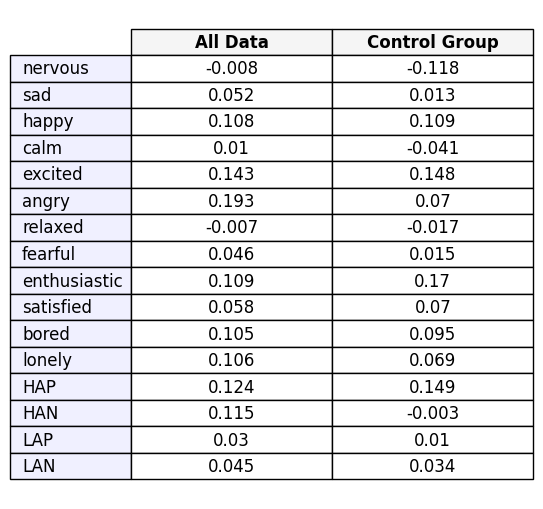

In [244]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate correlations for all data
correlations_all = {}
for emotion in emotions:
    corr = df[[f'average_predicted_{emotion}', f'post_survey_{emotion}']].corr().iloc[0, 1]
    correlations_all[emotion] = corr
corr_all_df = pd.DataFrame.from_dict(correlations_all, orient='index', columns=['All Data'])

# Calculate correlations for control group
df_controls = df[df['user_condition'] == 'I_C']
correlations_ctrl = {}
for emotion in emotions:
    corr = df_controls[[f'average_predicted_{emotion}', f'post_survey_{emotion}']].corr().iloc[0, 1]
    correlations_ctrl[emotion] = corr
corr_ctrl_df = pd.DataFrame.from_dict(correlations_ctrl, orient='index', columns=['Control Group'])

# Combine both into one DataFrame
combined_corr_df = pd.concat([corr_all_df, corr_ctrl_df], axis=1).round(3)

# Plot the table
fig, ax = plt.subplots(figsize=(6, len(emotions)*0.2 + 2))
ax.axis('off')

# Create table plot
table = ax.table(
    cellText=combined_corr_df.values,
    rowLabels=combined_corr_df.index,
    colLabels=combined_corr_df.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.3)  # Adjust scale to fit nicely

# Header coloring
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('black')
    if row == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#f5f5f5')  # light gray for header
    elif col == -1:
        cell.set_facecolor('#f0f0ff')  # slight lavender tint for emotion row labels
    else:
        cell.set_facecolor('white')   # data cells background


plt.tight_layout()
plt.savefig('correlations_table.png', dpi=300)
plt.show()


Regression Analyses

In [174]:
df.columns

Index(['user_id', 'average_predicted_nervous', 'average_predicted_sad',
       'average_predicted_happy', 'average_predicted_calm',
       'average_predicted_excited', 'average_predicted_aroused',
       'average_predicted_angry', 'average_predicted_relaxed',
       'average_predicted_fearful', 'average_predicted_enthusiastic',
       'average_predicted_still', 'average_predicted_satisfied',
       'average_predicted_bored', 'average_predicted_lonely',
       'post_survey_nervous', 'post_survey_sad', 'post_survey_happy',
       'post_survey_calm', 'post_survey_excited', 'post_survey_angry',
       'post_survey_relaxed', 'post_survey_fearful',
       'post_survey_enthusiastic', 'post_survey_satisfied',
       'post_survey_bored', 'post_survey_lonely', 'user_condition', 'gender',
       'age', 'ladder', 'pre_survey_enthusiastic', 'pre_survey_happy',
       'pre_survey_still', 'pre_survey_lonely', 'pre_survey_sad',
       'pre_survey_nervous', 'pre_survey_satisfied', 'pre_survey_calm',
  

In [175]:
df.head()

,user_id,average_predicted_nervous,average_predicted_sad,average_predicted_happy,average_predicted_calm,average_predicted_excited,average_predicted_aroused,average_predicted_angry,average_predicted_relaxed,average_predicted_fearful,...,pre_survey_LAP,pre_survey_LAN,post_survey_HAP,post_survey_HAN,post_survey_LAP,post_survey_LAN,average_predicted_HAP,average_predicted_HAN,average_predicted_LAP,average_predicted_LAN
0,009FBF921182482EB3B2C7C66D5DF395,1.793537,1.554758,2.262118,1.253142,2.865350,2.351885,2.202873,1.260323,2.041293,...,2.666667,1.333333,2.666667,1.666667,3.666667,1.666667,2.637941,2.012567,1.380610,1.206463
1,015D95BA960E4D8387F933A0C7E87F69,1.657895,1.491228,2.600877,1.135965,3.118421,2.442982,2.254386,1.131579,1.732456,...,1.000000,2.000000,1.000000,2.333333,1.333333,2.000000,2.896199,1.881579,1.314327,1.185673
2,028687F82CEF4E15B1B596ED0A8BD7A1,1.300881,1.346869,3.075342,1.162916,3.295010,2.421233,2.266145,1.162427,1.334638,...,4.333333,1.333333,5.000000,1.000000,4.333333,1.000000,3.280822,1.633888,1.468852,1.130952
3,02959600EFEE405789463BE83D574429,1.610315,1.541547,2.616046,1.077364,3.171920,2.432665,2.103152,1.088825,1.693410,...,3.000000,2.000000,3.000000,1.333333,2.666667,2.333333,2.922636,1.802292,1.240688,1.206304
4,0492FC538C4245778A446716617CEBFE,1.184466,1.320388,3.417476,1.097087,3.737864,2.650485,1.495146,1.077670,1.106796,...,2.666667,2.000000,2.333333,1.333333,3.333333,2.333333,3.608414,1.262136,1.372168,1.132686


In [176]:
# assign gender as binary
df['binary_female'] = 0
df.binary_female[df.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_27540/77603616.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.binary_female[df.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_27540/776036

In [177]:
df.columns

Index(['user_id', 'average_predicted_nervous', 'average_predicted_sad',
       'average_predicted_happy', 'average_predicted_calm',
       'average_predicted_excited', 'average_predicted_aroused',
       'average_predicted_angry', 'average_predicted_relaxed',
       'average_predicted_fearful', 'average_predicted_enthusiastic',
       'average_predicted_still', 'average_predicted_satisfied',
       'average_predicted_bored', 'average_predicted_lonely',
       'post_survey_nervous', 'post_survey_sad', 'post_survey_happy',
       'post_survey_calm', 'post_survey_excited', 'post_survey_angry',
       'post_survey_relaxed', 'post_survey_fearful',
       'post_survey_enthusiastic', 'post_survey_satisfied',
       'post_survey_bored', 'post_survey_lonely', 'user_condition', 'gender',
       'age', 'ladder', 'pre_survey_enthusiastic', 'pre_survey_happy',
       'pre_survey_still', 'pre_survey_lonely', 'pre_survey_sad',
       'pre_survey_nervous', 'pre_survey_satisfied', 'pre_survey_calm',
  

In [76]:
df[['pre_survey_sad', 'average_predicted_sad', 'post_survey_sad']].corr()

,pre_survey_sad,average_predicted_sad,post_survey_sad
pre_survey_sad,1.000000,0.004167,0.481828
average_predicted_sad,0.004167,1.000000,0.052113
post_survey_sad,0.481828,0.052113,1.000000


In [77]:
for emo in emotions:
    col_pre  = f'pre_survey_{emo.lower()}'
    col_pred = f'average_predicted_{emo.lower()}'
    col_post = f'post_survey_{emo.lower()}'

    print(f"\n=== Correlation for {emo} ===")a
    try:
        corr_matrix = df[[col_pre, col_pred, col_post]].corr()
        print(corr_matrix)
    except KeyError as e:
        print(f"Missing columns for {emo}: {e}")


=== Correlation for Nervous ===
                           pre_survey_nervous  average_predicted_nervous  \
pre_survey_nervous                   1.000000                  -0.077405   
average_predicted_nervous           -0.077405                   1.000000   
post_survey_nervous                  0.485748                  -0.008243   

                           post_survey_nervous  
pre_survey_nervous                    0.485748  
average_predicted_nervous            -0.008243  
post_survey_nervous                   1.000000  

=== Correlation for Sad ===
                       pre_survey_sad  average_predicted_sad  post_survey_sad
pre_survey_sad               1.000000               0.004167         0.481828
average_predicted_sad        0.004167               1.000000         0.052113
post_survey_sad              0.481828               0.052113         1.000000

=== Correlation for Happy ===
                         pre_survey_happy  average_predicted_happy  \
pre_survey_happy        

In [85]:
for emo in emotion_categories:
    col_pre  = f'pre_survey_{emo}'
    col_pred = f'average_predicted_{emo}'
    col_post = f'post_survey_{emo}'

    print(f"\n=== Correlation for {emo} ===")
    try:
        corr_matrix = df[[col_pre, col_pred, col_post]].corr()
        print(corr_matrix)
    except KeyError as e:
        print(f"Missing columns for {emo}: {e}")


=== Correlation for HAP ===
                       pre_survey_HAP  average_predicted_HAP  post_survey_HAP
pre_survey_HAP               1.000000               0.077042         0.667658
average_predicted_HAP        0.077042               1.000000         0.124358
post_survey_HAP              0.667658               0.124358         1.000000

=== Correlation for HAN ===
                       pre_survey_HAN  average_predicted_HAN  post_survey_HAN
pre_survey_HAN               1.000000               0.006848         0.584502
average_predicted_HAN        0.006848               1.000000         0.114706
post_survey_HAN              0.584502               0.114706         1.000000

=== Correlation for LAP ===
                       pre_survey_LAP  average_predicted_LAP  post_survey_LAP
pre_survey_LAP               1.000000               0.002158         0.587639
average_predicted_LAP        0.002158               1.000000         0.029983
post_survey_LAP              0.587639               0.0

Do the same for the I_C group. 

In [79]:
for emo in emotions:
    col_pre  = f'pre_survey_{emo.lower()}'
    col_pred = f'average_predicted_{emo.lower()}'
    col_post = f'post_survey_{emo.lower()}'

    print(f"\n=== Correlation for {emo} ===")
    try:
        corr_matrix = df_controls[[col_pre, col_pred, col_post]].corr()
        print(corr_matrix)
    except KeyError as e:
        print(f"Missing columns for {emo}: {e}")


=== Correlation for Nervous ===
                           pre_survey_nervous  average_predicted_nervous  \
pre_survey_nervous                   1.000000                   -0.16158   
average_predicted_nervous           -0.161580                    1.00000   
post_survey_nervous                  0.529987                   -0.11784   

                           post_survey_nervous  
pre_survey_nervous                    0.529987  
average_predicted_nervous            -0.117840  
post_survey_nervous                   1.000000  

=== Correlation for Sad ===
                       pre_survey_sad  average_predicted_sad  post_survey_sad
pre_survey_sad               1.000000              -0.095404         0.416846
average_predicted_sad       -0.095404               1.000000         0.012949
post_survey_sad              0.416846               0.012949         1.000000

=== Correlation for Happy ===
                         pre_survey_happy  average_predicted_happy  \
pre_survey_happy        

In [88]:
for emo in emotion_categories:
    col_pre  = f'pre_survey_{emo}'
    col_pred = f'average_predicted_{emo}'
    col_post = f'post_survey_{emo}'

    print(f"\n=== Correlation for {emo} ===")
    try:
        corr_matrix = df_controls[[col_pre, col_pred, col_post]].corr()
        print(corr_matrix)
    except KeyError as e:
        print(f"Missing columns for {emo}: {e}")


=== Correlation for HAP ===
                       pre_survey_HAP  average_predicted_HAP  post_survey_HAP
pre_survey_HAP               1.000000               0.004674         0.643796
average_predicted_HAP        0.004674               1.000000         0.148822
post_survey_HAP              0.643796               0.148822         1.000000

=== Correlation for HAN ===
                       pre_survey_HAN  average_predicted_HAN  post_survey_HAN
pre_survey_HAN               1.000000              -0.081397         0.623301
average_predicted_HAN       -0.081397               1.000000        -0.002793
post_survey_HAN              0.623301              -0.002793         1.000000

=== Correlation for LAP ===
                       pre_survey_LAP  average_predicted_LAP  post_survey_LAP
pre_survey_LAP               1.000000              -0.108834         0.602488
average_predicted_LAP       -0.108834               1.000000         0.010276
post_survey_LAP              0.602488               0.0

It seems that the pre_survey and post_survey data are highly correlated. But it would be cool to find out if the exposure made an impact. 

Regression!

In [89]:
import statsmodels.formula.api as smf

In [178]:
# make z scores

df['var_age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['var_age'].describe()

df['var_ladder'] = (df['ladder'] - df['ladder'].mean())
df['var_ladder'].describe()

count    1.249000e+03
mean     2.275557e-16
std      1.755925e+00
min     -4.213771e+00
25%     -1.213771e+00
50%     -2.137710e-01
75%      1.786229e+00
max      4.786229e+00
Name: var_ladder, dtype: float64

In [181]:
df.columns

Index(['user_id', 'average_predicted_nervous', 'average_predicted_sad',
       'average_predicted_happy', 'average_predicted_calm',
       'average_predicted_excited', 'average_predicted_aroused',
       'average_predicted_angry', 'average_predicted_relaxed',
       'average_predicted_fearful', 'average_predicted_enthusiastic',
       'average_predicted_still', 'average_predicted_satisfied',
       'average_predicted_bored', 'average_predicted_lonely',
       'post_survey_nervous', 'post_survey_sad', 'post_survey_happy',
       'post_survey_calm', 'post_survey_excited', 'post_survey_angry',
       'post_survey_relaxed', 'post_survey_fearful',
       'post_survey_enthusiastic', 'post_survey_satisfied',
       'post_survey_bored', 'post_survey_lonely', 'user_condition', 'gender',
       'age', 'ladder', 'pre_survey_enthusiastic', 'pre_survey_happy',
       'pre_survey_still', 'pre_survey_lonely', 'pre_survey_sad',
       'pre_survey_nervous', 'pre_survey_satisfied', 'pre_survey_calm',
  

In [184]:
emotions = ['nervous', 'sad', 'happy', 'calm', 'excited',
            'angry', 'relaxed', 'fearful', 'enthusiastic', 'satisfied',
            'bored', 'lonely', 'HAP', 'HAN', 'LAP', 'LAN']
for emo in emotions:
    col_name = f'pre_survey_{emo}'
    z_col_name = f'var_{col_name}'
    df[z_col_name] = (df[col_name] - df[col_name].mean()) / df[col_name].std()

df['var_pre_survey_HAP'].describe()

count    1.250000e+03
mean     8.242296e-17
std      1.000000e+00
min     -1.659315e+00
25%     -6.335266e-01
50%     -2.915973e-01
75%      7.341906e-01
max      2.443837e+00
Name: var_pre_survey_HAP, dtype: float64

In [ ]:
md = smf.mixedlm(f"post_survey_{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + average_predicted_{emotion}", df, groups=df["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

In [100]:
for emotion in emotions:
    print("-" * 30)
    print("Regression Result for " + emotion)
    md = smf.mixedlm(f"post_survey_{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + average_predicted_{emotion}", df, groups=df["user_id"], missing='drop')
    mdf = md.fit()
    print(mdf.summary())

------------------------------
Regression Result for nervous


/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


               Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  post_survey_nervous
No. Observations:  1248     Method:              REML               
No. Groups:        1248     Scale:               0.3906             
Min. group size:   1        Log-Likelihood:      -1628.5261         
Max. group size:   1        Converged:           Yes                
Mean group size:   1.0                                              
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  1.560    0.042 36.718 0.000  1.477  1.644
var_age                   -0.097    0.025 -3.845 0.000 -0.146 -0.048
binary_female              0.005    0.051  0.091 0.928 -0.095  0.104
var_ladder                -0.045    0.014 -3.135 0.002 -0.073 -0.017
var_pre_survey_nervous     0.486    0.025 19.471 0

/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  post_survey_sad
No. Observations:  1248     Method:              REML           
No. Groups:        1248     Scale:               0.3579         
Min. group size:   1        Log-Likelihood:      -1573.9143     
Max. group size:   1        Converged:           Yes            
Mean group size:   1.0                                          
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              1.690    0.178  9.478 0.000  1.340  2.039
var_age                0.001    0.024  0.060 0.953 -0.046  0.049
binary_female         -0.046    0.048 -0.942 0.346 -0.141  0.049
var_ladder            -0.073    0.014 -5.229 0.000 -0.100 -0.045
var_pre_survey_sad     0.455    0.017 26.396 0.000  0.421  0.489
average_predicted_sad  0.296    0.123  

/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  post_survey_happy
No. Observations:  1248     Method:              REML             
No. Groups:        1248     Scale:               0.3709           
Min. group size:   1        Log-Likelihood:      -1597.2468       
Max. group size:   1        Converged:           Yes              
Mean group size:   1.0                                            
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                2.433    0.051 48.006 0.000  2.333  2.532
var_age                  0.022    0.025  0.906 0.365 -0.026  0.071
binary_female           -0.005    0.049 -0.097 0.923 -0.102  0.092
var_ladder               0.078    0.014  5.454 0.000  0.050  0.106
var_pre_survey_happy     0.602    0.025 23.997 0.000  0.553  0.651
average_pr

/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


               Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  post_survey_relaxed
No. Observations:  1248     Method:              REML               
No. Groups:        1248     Scale:               0.4772             
Min. group size:   1        Log-Likelihood:      -1752.5591         
Max. group size:   1        Converged:           Yes                
Mean group size:   1.0                                              
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  3.292    0.052 63.594 0.000  3.191  3.394
var_age                    0.039    0.028  1.397 0.162 -0.016  0.093
binary_female              0.010    0.056  0.174 0.862 -0.099  0.119
var_ladder                 0.046    0.016  2.855 0.004  0.014  0.077
var_pre_survey_relaxed     0.539    0.028 19.213 0

/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


                 Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: post_survey_enthusiastic
No. Observations:   1248    Method:             REML                    
No. Groups:         1248    Scale:              0.4242                  
Min. group size:    1       Log-Likelihood:     -1680.3502              
Max. group size:    1       Converged:          Yes                     
Mean group size:    1.0                                                 
------------------------------------------------------------------------
                               Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      1.654    0.133 12.432 0.000  1.394  1.915
var_age                        0.050    0.026  1.914 0.056 -0.001  0.101
binary_female                  0.008    0.051  0.164 0.870 -0.091  0.108
var_ladder                     0.067    0.015  4.588 0.000  0.039  0.

/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [187]:
df.columns

Index(['user_id', 'average_predicted_nervous', 'average_predicted_sad',
       'average_predicted_happy', 'average_predicted_calm',
       'average_predicted_excited', 'average_predicted_aroused',
       'average_predicted_angry', 'average_predicted_relaxed',
       'average_predicted_fearful', 'average_predicted_enthusiastic',
       'average_predicted_still', 'average_predicted_satisfied',
       'average_predicted_bored', 'average_predicted_lonely',
       'post_survey_nervous', 'post_survey_sad', 'post_survey_happy',
       'post_survey_calm', 'post_survey_excited', 'post_survey_angry',
       'post_survey_relaxed', 'post_survey_fearful',
       'post_survey_enthusiastic', 'post_survey_satisfied',
       'post_survey_bored', 'post_survey_lonely', 'user_condition', 'gender',
       'age', 'ladder', 'pre_survey_enthusiastic', 'pre_survey_happy',
       'pre_survey_still', 'pre_survey_lonely', 'pre_survey_sad',
       'pre_survey_nervous', 'pre_survey_satisfied', 'pre_survey_calm',
  

In [186]:
import pandas as pd
import statsmodels.formula.api as smf

emotions = ['nervous', 'sad', 'happy', 'calm', 'excited',
            'angry', 'relaxed', 'fearful', 'enthusiastic', 'satisfied',
            'bored', 'lonely', 'HAP', 'HAN', 'LAP', 'LAN']

# This list will store results for each emotion
all_results = []

for emotion in emotions:
    formula = f"post_survey_{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + average_predicted_{emotion}"
    md = smf.mixedlm(formula, df, groups=df["user_id"], missing='drop')
    try:
        mdf = md.fit()

        # Create a result row for this emotion
        result_row = {'emotion': emotion}

        for var in ['var_age', 'binary_female', 'var_ladder', f'var_pre_survey_{emotion}', f'average_predicted_{emotion}']:
            coef = mdf.params.get(var, float('nan'))
            pval = mdf.pvalues.get(var, float('nan'))
            result_row[f'{var}_coef'] = coef
            result_row[f'{var}_pval'] = pval

        all_results.append(result_row)

    except Exception as e:
        all_results.append({'emotion': emotion, 'error': str(e)})

# Convert to DataFrame
results_df = pd.DataFrame(all_results)

# Save to Excel
results_df.to_csv("full_mixedlm_results.csv", index=False)


/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceW

In [188]:
results_df.head()

,emotion,var_age_coef,var_age_pval,binary_female_coef,binary_female_pval,var_ladder_coef,var_ladder_pval,var_pre_survey_nervous_coef,var_pre_survey_nervous_pval,average_predicted_nervous_coef,...,average_predicted_HAN_coef,average_predicted_HAN_pval,var_pre_survey_LAP_coef,var_pre_survey_LAP_pval,average_predicted_LAP_coef,average_predicted_LAP_pval,var_pre_survey_LAN_coef,var_pre_survey_LAN_pval,average_predicted_LAN_coef,average_predicted_LAN_pval
0,nervous,-0.096995,0.000120,0.004616,0.927574,-0.045089,1.719684e-03,0.486298,1.925928e-84,0.238697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sad,0.001446,0.952541,-0.045678,0.346152,-0.072597,1.700799e-07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,happy,0.022293,0.364760,-0.004804,0.922607,0.078255,4.922965e-08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,calm,0.022106,0.411053,-0.031677,0.568633,0.036815,1.487540e-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,excited,-0.008378,0.747425,0.003630,0.944334,0.082409,4.149747e-08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I have a csv that has all regression results. I want to re-organize it in a readable format.

In [189]:
# alternate the rows and columns names of the csv
results_df_transposed = results_df.set_index('emotion').T
results_df_transposed.head()


emotion,nervous,sad,happy,calm,excited,angry,relaxed,fearful,enthusiastic,satisfied,bored,lonely,HAP,HAN,LAP,LAN
var_age_coef,-0.096995,0.001446,0.022293,0.022106,-0.008378,-0.029442,0.038837,-0.046389,0.050025,0.029528,-0.079469,-0.064184,0.028853,-0.056870,0.027859,-0.048031
var_age_pval,0.000120,0.952541,0.364760,0.411053,0.747425,0.236044,0.162320,0.064465,0.055588,0.267171,0.004683,0.007654,0.158300,0.004506,0.193926,0.006882
binary_female_coef,0.004616,-0.045678,-0.004804,-0.031677,0.003630,-0.050075,0.009681,-0.009461,0.008317,0.049309,0.004990,-0.086845,0.019305,-0.019515,0.021596,-0.042794
binary_female_pval,0.927574,0.346152,0.922607,0.568633,0.944334,0.315048,0.861793,0.850085,0.869580,0.361624,0.925786,0.072320,0.642284,0.622417,0.622082,0.215458
var_ladder_coef,-0.045089,-0.072597,0.078255,0.036815,0.082409,-0.052093,0.045843,-0.011708,0.067490,0.090381,-0.060221,-0.060044,0.061793,-0.032129,0.049031,-0.059715


In [193]:
df = results_df_transposed.copy()

In [194]:
# Merge coefficients and p-values, and add significance stars

# Function to determine significance stars
def starify(coef, pval):
    if pd.isna(coef) or pd.isna(pval):
        return ''
    if pval <= 0.001:
        return f"{coef:.3f}***"
    elif pval <= 0.01:
        return f"{coef:.3f}**"
    elif pval <= 0.05:
        return f"{coef:.3f}*"
    else:
        return f"{coef:.3f}"

# Create a new DataFrame to store the starified results
merged_df = pd.DataFrame(columns=df.columns)

# Go row-by-row in steps of 2 (coef row and its pval row)
row_labels = df.index
for i in range(0, len(row_labels), 2):
    coef_label = row_labels[i]
    pval_label = row_labels[i+1]
    
    coef_row = df.loc[coef_label]
    pval_row = df.loc[pval_label]
    
    # Apply starify to each column (emotion)
    merged_row = [
        starify(coef_row[emotion], pval_row[emotion])
        for emotion in df.columns
    ]
    
    # Strip "_coef" from the row label for clarity
    clean_label = coef_label.replace('_coef', '')
    merged_df.loc[clean_label] = merged_row

# Set variable names as index
merged_df.head()


emotion,nervous,sad,happy,calm,excited,angry,relaxed,fearful,enthusiastic,satisfied,bored,lonely,HAP,HAN,LAP,LAN
var_age,-0.097***,0.001,0.022,0.022,-0.008,-0.029,0.039,-0.046,0.050,0.030,-0.079**,-0.064**,0.029,-0.057**,0.028,-0.048**
binary_female,0.005,-0.046,-0.005,-0.032,0.004,-0.050,0.010,-0.009,0.008,0.049,0.005,-0.087,0.019,-0.020,0.022,-0.043
var_ladder,-0.045**,-0.073***,0.078***,0.037*,0.082***,-0.052***,0.046**,-0.012,0.067***,0.090***,-0.060***,-0.060***,0.062***,-0.032**,0.049***,-0.060***
var_pre_survey_nervous,0.486***,,,,,,,,,,,,,,,
average_predicted_nervous,0.239***,,,,,,,,,,,,,,,


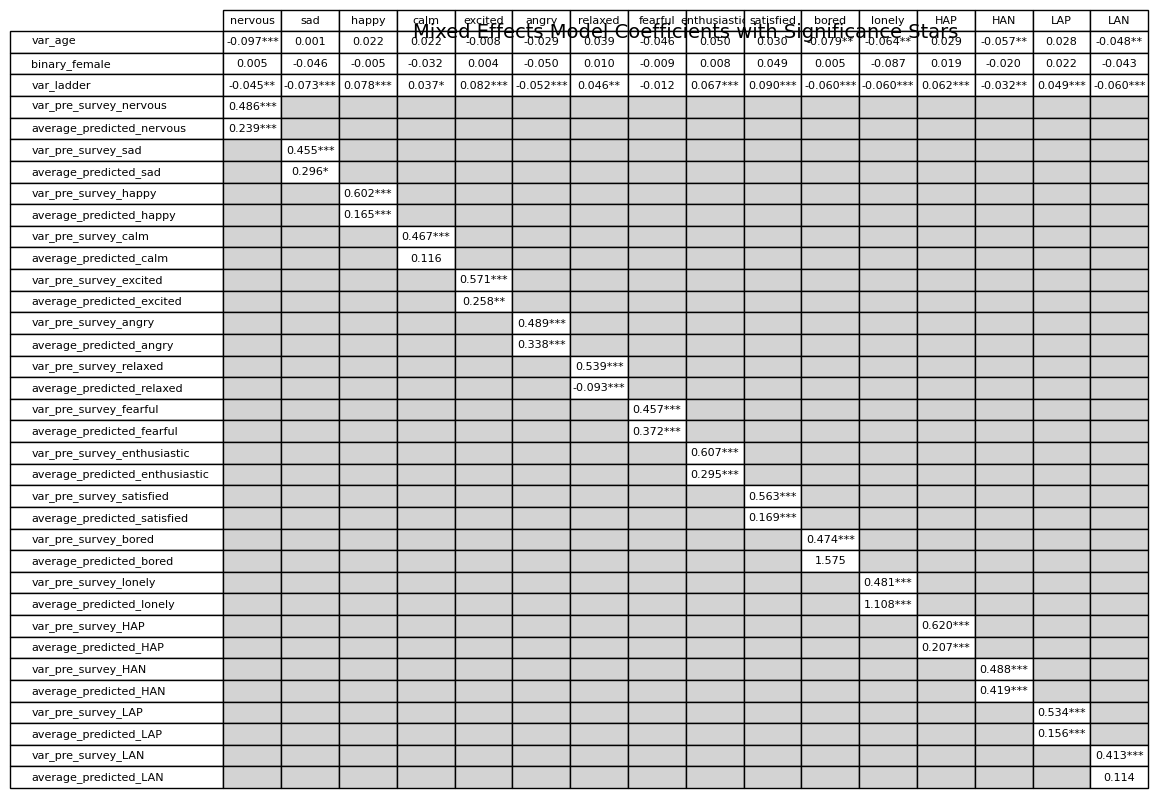

In [195]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure empty or NaN cells are represented clearly
clean_df = merged_df.fillna("")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')  # Hide axis lines and ticks

# Create the table
table = ax.table(
    cellText=clean_df.values,
    rowLabels=clean_df.index,
    colLabels=clean_df.columns,
    cellLoc='center',
    loc='center'
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

# Highlight cells that are missing (empty string) with grey
for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        # Header row and index column
        cell.set_facecolor('white')
    else:
        val = clean_df.iloc[row - 1, col]
        if val == "":
            cell.set_facecolor('lightgrey')  # grey if missing
        else:
            cell.set_facecolor('white')      # white if has data
    cell.set_edgecolor('black')

# Add title and save
plt.title('Mixed Effects Model Coefficients with Significance Stars', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('mixed_effects_model_results.png', dpi=300)
plt.show()


In [198]:
all_data = df.copy()

In [205]:
df.head()

emotion,HAP,HAN,LAP,LAN
var_age,0.029,-0.057**,0.028,-0.048**
binary_female,0.019,-0.020,0.022,-0.043
var_ladder,0.062***,-0.032**,0.049***,-0.060***
var_pre_survey_nervous,,,,
average_predicted_nervous,,,,


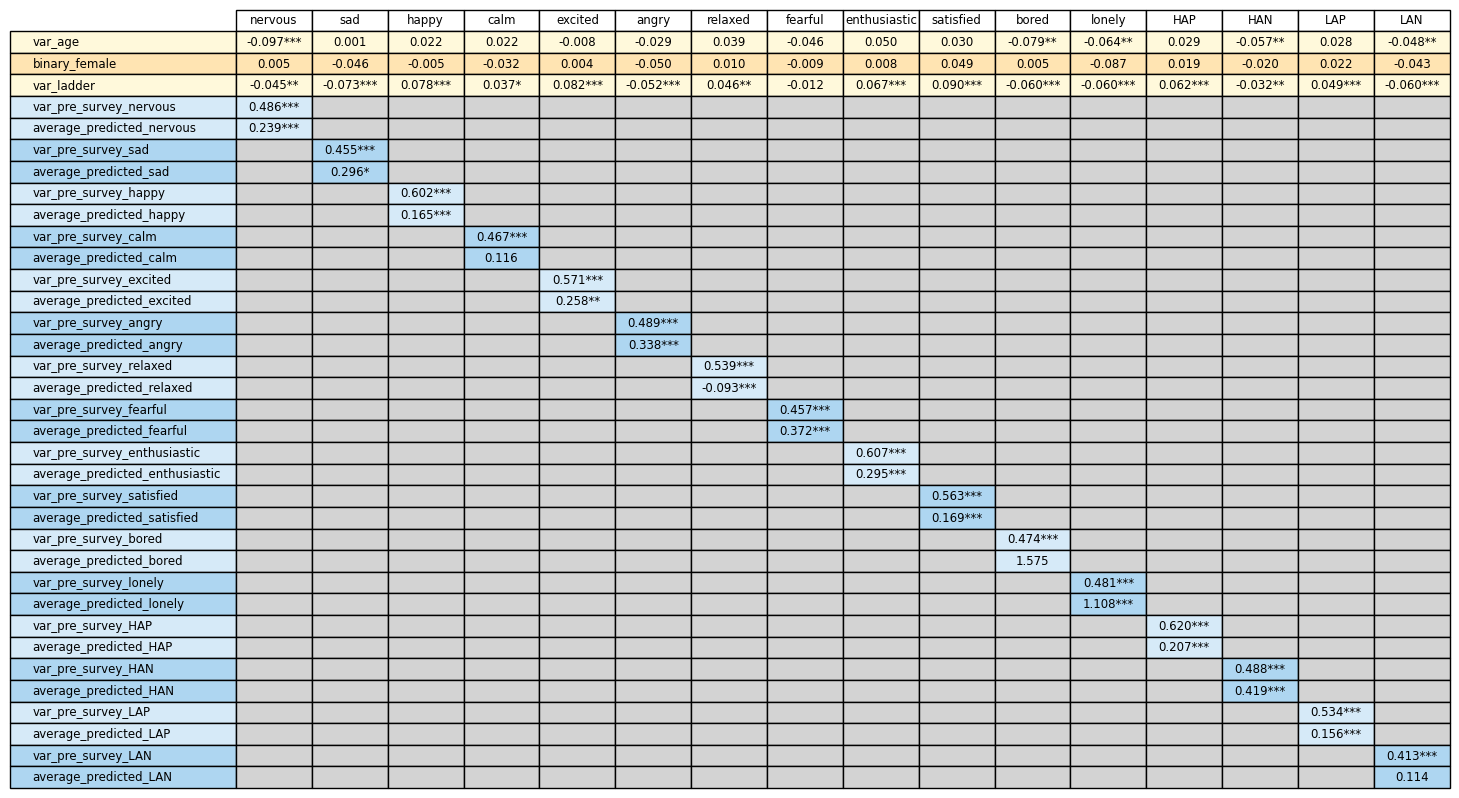

In [212]:
import matplotlib.pyplot as plt
import pandas as pd

clean_df = merged_df.fillna("")

fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')

table = ax.table(
    cellText=clean_df.values,
    rowLabels=clean_df.index,
    colLabels=clean_df.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(8.5)
table.scale(1.2, 1.2)  

# Define colors
light_yellow = '#fff9db'  # pale yellow
light_orange = '#ffe4b2'  # light orange
light_blue = '#d6eaf8'    # lighter blue
dark_blue = '#aed6f1'     # darker blue
white = 'white'

for (row, col), cell in table.get_celld().items():
    if row == 0:
        # Header row - white
        cell.set_facecolor('white')
    else:
        # Determine color for the row (same logic as before)
        if row <= 3:
            # first 3 data rows: alternate yellow/orange
            if row % 2 == 1:
                base_color = '#fff9db'  # light yellow
            else:
                base_color = '#ffe4b2'  # light orange
        else:
            group_num = (row - 4) // 2
            if group_num % 2 == 0:
                base_color = '#d6eaf8'  # lighter blue
            else:
                base_color = '#aed6f1'  # darker blue

        if col == -1:
            # Leftmost column: set to base color (same as row)
            cell.set_facecolor(base_color)
        else:
            val = clean_df.iloc[row - 1, col]
            if val == "":
                cell.set_facecolor('lightgrey')
            else:
                cell.set_facecolor(base_color)

    cell.set_edgecolor('black')


plt.tight_layout()
plt.savefig('mixed_effects_model_results.png', dpi=300)
plt.show()


Now do the same for the I_C Group.

In [190]:
df_controls = df[df['user_condition'] == 'I_C']

In [191]:
print(len(df_controls))

252


In [213]:
df = df_controls.copy()

In [215]:
# assign gender as binary
df['binary_female'] = 0
df.binary_female[df.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_27540/77603616.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.binary_female[df.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_27540/776036

In [214]:
df['var_age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['var_age'].describe()

df['var_ladder'] = (df['ladder'] - df['ladder'].mean())
df['var_ladder'].describe()

count    2.510000e+02
mean     7.077119e-18
std      1.702372e+00
min     -4.043825e+00
25%     -1.043825e+00
50%     -4.382470e-02
75%      9.561753e-01
max      4.956175e+00
Name: var_ladder, dtype: float64

In [217]:
emotions = ['nervous', 'sad', 'happy', 'calm', 'excited',
            'angry', 'relaxed', 'fearful', 'enthusiastic', 'satisfied',
            'bored', 'lonely', 'HAP', 'HAN', 'LAP', 'LAN']  
for emo in emotions:
    col_name = f'pre_survey_{emo}'
    z_col_name = f'var_{col_name}'
    df[z_col_name] = (df[col_name] - df[col_name].mean()) / df[col_name].std()

df['var_pre_survey_angry'].describe()

count    2.520000e+02
mean     9.516197e-17
std      1.000000e+00
min     -1.264656e+00
25%     -2.810347e-01
50%     -2.810347e-01
75%      7.025867e-01
max      2.669829e+00
Name: var_pre_survey_angry, dtype: float64

In [224]:
import pandas as pd
import statsmodels.formula.api as smf

emotions = ['nervous', 'sad', 'happy', 'calm', 'excited',
            'angry', 'relaxed', 'fearful', 'enthusiastic', 'satisfied',
            'bored', 'lonely', 'HAP', 'HAN', 'LAP', 'LAN']

# This list will store results for each emotion
control_results = []

for emotion in emotions:
    formula = f"post_survey_{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + average_predicted_{emotion}"
    md = smf.mixedlm(formula, df_controls, groups=df_controls["user_id"], missing='drop')
    try:
        mdf = md.fit()

        # Create a result row for this emotion
        result_row = {'emotion': emotion}

        for var in ['var_age', 'binary_female', 'var_ladder', f'var_pre_survey_{emotion}', f'average_predicted_{emotion}']:
            coef = mdf.params.get(var, float('nan'))
            pval = mdf.pvalues.get(var, float('nan'))
            result_row[f'{var}_coef'] = coef
            result_row[f'{var}_pval'] = pval

        control_results.append(result_row)

    except Exception as e:
        control_results.append({'emotion': emotion, 'error': str(e)})

# Convert to DataFrame
control_results_df = pd.DataFrame(control_results)

/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/xuyangzhu/Desktop/cs projects/implicit_emotion/implied/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceW

In [225]:
results_df_transposed = control_results_df.set_index('emotion').T
results_df_transposed.head()

emotion,nervous,sad,happy,calm,excited,angry,relaxed,fearful,enthusiastic,satisfied,bored,lonely,HAP,HAN,LAP,LAN
var_age_coef,-0.140951,-0.029636,0.005632,0.000993,0.003036,-0.004288,0.069102,-0.062909,0.031292,0.032841,-0.131001,-0.090686,0.020485,-0.068555,0.032808,-0.076198
var_age_pval,0.020240,0.593289,0.915953,0.986464,0.958642,0.940549,0.261763,0.264031,0.591897,0.578406,0.034799,0.088273,0.659791,0.043974,0.348713,0.042872
binary_female_coef,-0.038717,-0.097203,0.025047,-0.134513,0.049442,-0.083433,-0.068841,0.040793,0.026102,0.018638,-0.069330,-0.084481,0.047784,-0.014264,-0.066769,-0.082810
binary_female_pval,0.746156,0.387756,0.780725,0.277926,0.674197,0.469014,0.591598,0.713022,0.827101,0.877539,0.559949,0.430060,0.615921,0.869052,0.493182,0.248234
var_ladder_coef,0.020188,-0.057037,0.106146,0.029138,0.115627,-0.050055,0.052952,-0.010275,0.107701,0.091209,-0.065306,-0.035966,0.096078,-0.009030,0.052021,-0.045814


In [226]:
df = results_df_transposed.copy()

In [227]:
# Merge coefficients and p-values, and add significance stars

# Function to determine significance stars
def starify(coef, pval):
    if pd.isna(coef) or pd.isna(pval):
        return ''
    if pval <= 0.001:
        return f"{coef:.3f}***"
    elif pval <= 0.01:
        return f"{coef:.3f}**"
    elif pval <= 0.05:
        return f"{coef:.3f}*"
    else:
        return f"{coef:.3f}"

# Create a new DataFrame to store the starified results
merged_df = pd.DataFrame(columns=df.columns)

# Go row-by-row in steps of 2 (coef row and its pval row)
row_labels = df.index
for i in range(0, len(row_labels), 2):
    coef_label = row_labels[i]
    pval_label = row_labels[i+1]
    
    coef_row = df.loc[coef_label]
    pval_row = df.loc[pval_label]
    
    # Apply starify to each column (emotion)
    merged_row = [
        starify(coef_row[emotion], pval_row[emotion])
        for emotion in df.columns
    ]
    
    # Strip "_coef" from the row label for clarity
    clean_label = coef_label.replace('_coef', '')
    merged_df.loc[clean_label] = merged_row

# Set variable names as index
merged_df.head()


emotion,nervous,sad,happy,calm,excited,angry,relaxed,fearful,enthusiastic,satisfied,bored,lonely,HAP,HAN,LAP,LAN
var_age,-0.141*,-0.030,0.006,0.001,0.003,-0.004,0.069,-0.063,0.031,0.033,-0.131*,-0.091,0.020,-0.069*,0.033,-0.076*
binary_female,-0.039,-0.097,0.025,-0.135,0.049,-0.083,-0.069,0.041,0.026,0.019,-0.069,-0.084,0.048,-0.014,-0.067,-0.083
var_ladder,0.020,-0.057,0.106**,0.029,0.116***,-0.050,0.053,-0.010,0.108**,0.091**,-0.065,-0.036,0.096***,-0.009,0.052,-0.046*
var_pre_survey_nervous,0.569***,,,,,,,,,,,,,,,
average_predicted_nervous,-0.095,,,,,,,,,,,,,,,


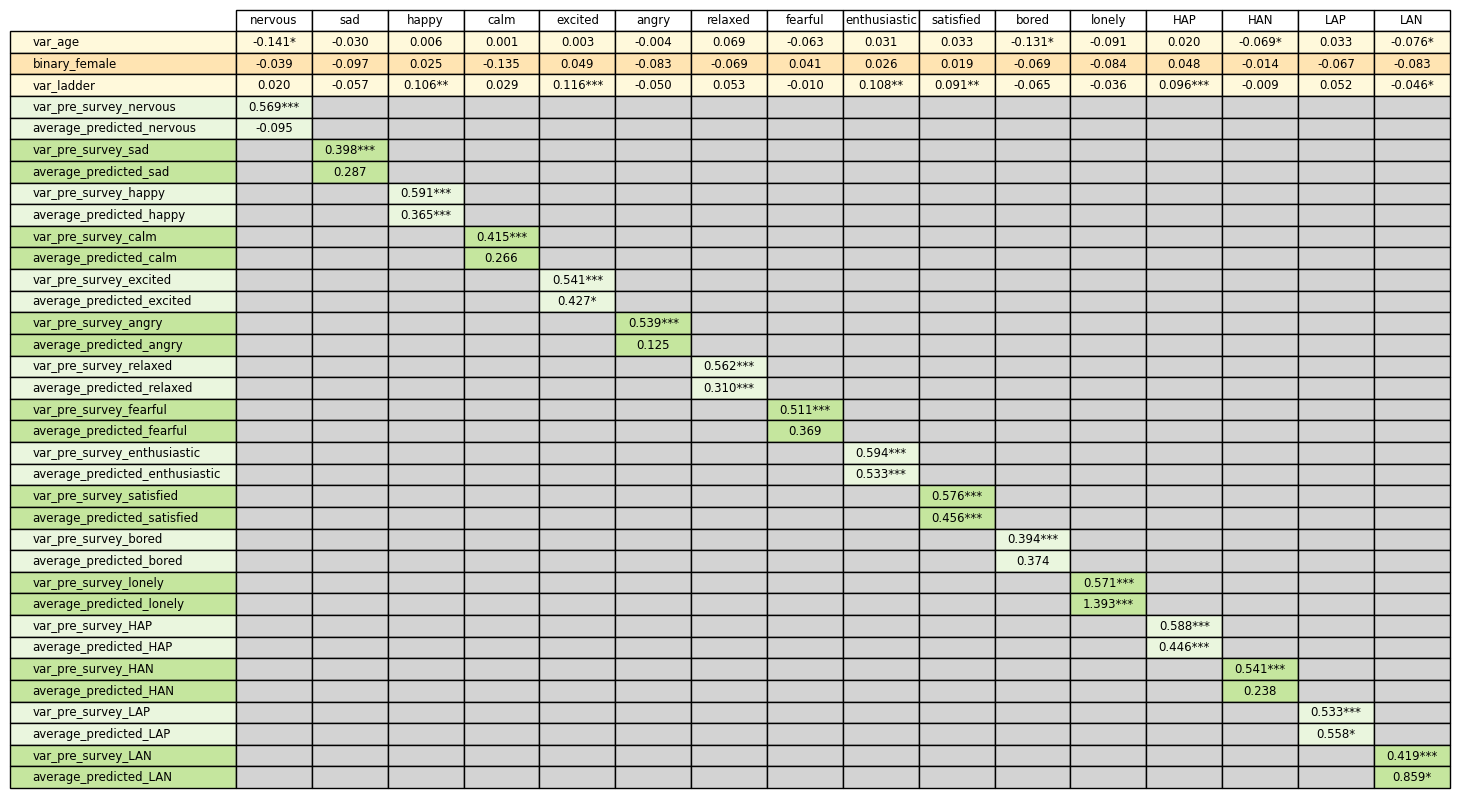

In [230]:
import matplotlib.pyplot as plt
import pandas as pd

clean_df = merged_df.fillna("")

fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')

table = ax.table(
    cellText=clean_df.values,
    rowLabels=clean_df.index,
    colLabels=clean_df.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(8.5)
table.scale(1.2, 1.2)  # wider cells as before

# Define colors
light_yellow = '#fff9db'  # pale yellow
light_orange = '#ffe4b2'  # light orange
light_blue = '#d6eaf8'    # lighter blue
dark_blue = '#aed6f1'     # darker blue
white = 'white'

for (row, col), cell in table.get_celld().items():
    if row == 0:
        # Header row - white
        cell.set_facecolor('white')
    else:
        # Determine color for the row (same logic as before)
        if row <= 3:
            # first 3 data rows: alternate yellow/orange
            if row % 2 == 1:
                base_color = '#fff9db'  # light yellow
            else:
                base_color = '#ffe4b2'  # light orange
        else:
            group_num = (row - 4) // 2
            if group_num % 2 == 0:
                base_color = "#eaf6de"  # lighter blue
            else:
                base_color = "#c5e69e"  # darker blue

        if col == -1:
            # Leftmost column: set to base color (same as row)
            cell.set_facecolor(base_color)
        else:
            val = clean_df.iloc[row - 1, col]
            if val == "":
                cell.set_facecolor('lightgrey')
            else:
                cell.set_facecolor(base_color)

    cell.set_edgecolor('black')


plt.tight_layout()
plt.savefig('control_group_mixed_effects_model_results.png', dpi=300)
plt.show()
